In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re


from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [159]:
pip install xgboost

     |████████████████████████████████| 157.5 MB 66 kB/s  eta 0:00:01    |██▉                             | 14.0 MB 1.4 MB/s eta 0:01:45     |███████▎                        | 35.7 MB 2.0 MB/s eta 0:01:00     |██████████████▏                 | 69.5 MB 1.7 MB/s eta 0:00:53     |██████████████▌                 | 71.6 MB 911 kB/s eta 0:01:35     |███████████████▍                | 75.6 MB 2.7 MB/s eta 0:00:31     |████████████████▏               | 79.7 MB 1.6 MB/s eta 0:00:50     |████████████████▌               | 81.2 MB 2.3 MB/s eta 0:00:34     |████████████████▋               | 81.5 MB 2.3 MB/s eta 0:00:34     |██████████████████▏             | 89.4 MB 1.7 MB/s eta 0:00:39     |█████████████████████           | 103.1 MB 2.1 MB/s eta 0:00:27     |████████████████████████▍       | 120.0 MB 860 kB/s eta 0:00:44     |█████████████████████████▍      | 124.8 MB 1.7 MB/s eta 0:00:20     |██████████████████████████▌     | 130.4 MB 1.8 MB/s eta 0:00:15     |█████████████████████████████   | 142.

In [107]:
pd.options.display.max_columns = None

In [108]:
df_listing = pd.read_csv('Data/listings_details.csv')
df_reviews = pd.read_csv('Data/reviews_Details.csv')
df_scrape = pd.read_csv('Data/Airbnb_Description.csv')
df_listing.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2265,https://www.airbnb.com/rooms/2265,20210210181232,2021-02-12,Zen-East in the Heart of Austin (monthly rental),Zen East is situated in a vibrant & diverse mu...,NaN,https://a0.muscache.com/pictures/4740524/63f82...,2466,https://www.airbnb.com/users/show/2466,Paddy,2008-08-23,"Austin, Texas, United States",I am a long time resident of Austin. I earned ...,within a few hours,100%,90%,f,https://a0.muscache.com/im/users/2466/profile_...,https://a0.muscache.com/im/users/2466/profile_...,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,NaN,78702,NaN,30.27750,-97.71398,Entire house,Entire home/apt,4,NaN,2 baths,2.0,2.0,"[""Free parking on premises"", ""Hair dryer"", ""Pa...",$200.00,7,180,7.0,7.0,180.0,180.0,7.0,180.0,NaN,t,13,13,42,131,2021-02-12,24,0,0,2009-03-17,2019-03-16,93.0,9.0,10.0,10.0,10.0,8.0,9.0,NaN,f,3,2,1,0,0.17
1,5245,https://www.airbnb.com/rooms/5245,20210210181232,2021-02-12,"Eco friendly, Colorful, Clean, Cozy monthly share",Situated in a vibrant & diverse multicultural ...,NaN,https://a0.muscache.com/pictures/5167505/b33b5...,2466,https://www.airbnb.com/users/show/2466,Paddy,2008-08-23,"Austin, Texas, United States",I am a long time resident of Austin. I earned ...,within a few hours,100%,90%,f,https://a0.muscache.com/im/users/2466/profile_...,https://a0.muscache.com/im/users/2466/profile_...,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,NaN,78702,NaN,30.27577,-97.71379,Private room in house,Private room,2,NaN,1 private bath,1.0,2.0,"[""Free parking on premises"", ""Hair dryer"", ""Br...",$114.00,30,60,30.0,30.0,60.0,60.0,30.0,60.0,NaN,t,0,0,0,0,2021-02-12,9,0,0,2009-03-19,2018-03-14,91.0,10.0,8.0,10.0,9.0,10.0,9.0,NaN,f,3,2,1,0,0.06


In [109]:
df_listing.shape

(10272, 74)

## Performing EDA Analysis

In [110]:
# Removing unnecessary columns
columns_to_remove = ['scrape_id','last_scraped','neighbourhood_group_cleansed','calendar_updated','license','bathrooms',
                     'picture_url','host_has_profile_pic','host_name','host_url','host_thumbnail_url','name',
                     'minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights',
                     'minimum_nights_avg_ntm','maximum_nights_avg_ntm','has_availability','host_picture_url',
                     'number_of_reviews_l30d','number_of_reviews_ltm','calendar_last_scraped',
                     'calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
                     'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','reviews_per_month',
                     'availability_30','availability_60','availability_90','availability_365','number_of_reviews',
                     'neighbourhood','instant_bookable','host_about',
                     'latitude','longitude'] 
df_listing.drop(columns_to_remove,axis=1,inplace=True)

In [111]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10272 entries, 0 to 10271
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           10272 non-null  int64  
 1   listing_url                  10272 non-null  object 
 2   description                  10064 non-null  object 
 3   neighborhood_overview        6545 non-null   object 
 4   host_id                      10272 non-null  int64  
 5   host_since                   10267 non-null  object 
 6   host_location                10247 non-null  object 
 7   host_response_time           6073 non-null   object 
 8   host_response_rate           6073 non-null   object 
 9   host_acceptance_rate         6850 non-null   object 
 10  host_is_superhost            10267 non-null  object 
 11  host_neighbourhood           8363 non-null   object 
 12  host_listings_count          10267 non-null  float64
 13  host_total_listi

### Renaming Columns

In [112]:
df_listing = df_listing.rename(columns={'neighbourhood_cleansed': 'zip_code'})

### Converting the columns data format

In [113]:
df_listing.first_review = pd.to_datetime(df_listing.first_review)
df_listing.last_review = pd.to_datetime(df_listing.last_review)
df_listing.host_since = pd.to_datetime(df_listing.host_since)

df_listing["Timeframe"] = (df_listing.last_review - df_listing.first_review).dt.days
df_listing.drop(['first_review','last_review'],axis=1,inplace=True)

In [114]:
# Filtering the prices and remove the highest ones due to SXSW festival
df_listing.price = df_listing.price.replace('[\$,]','',regex=True).astype(float)
df_listing = df_listing[df_listing.price<5200]

In [115]:
# Converting categories to numbers
df_listing.loc[:,'host_is_superhost'] = df_listing.host_is_superhost.map({'t':1,'f':0})




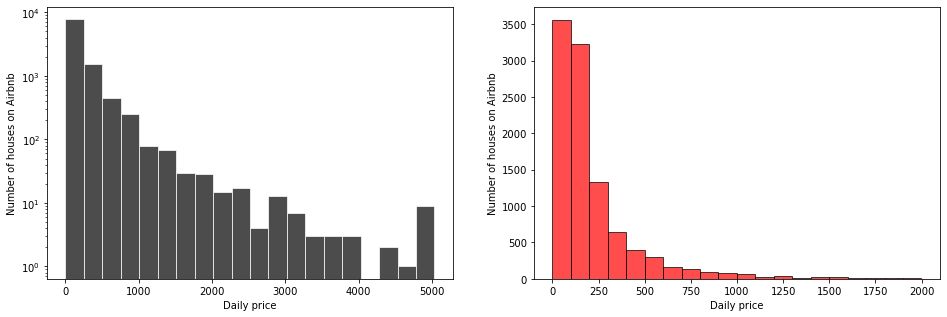

In [116]:
fig,axs = plt.subplots(1,2,figsize=(16,5))
axs[0].hist(df_listing.price,bins=20,color='k',alpha=0.7,edgecolor='w')
axs[0].set_yscale('log');
axs[0].set_xlabel('Daily price');
axs[0].set_ylabel('Number of houses on Airbnb');
axs[0].grid(b='None');
axs[0].grid(None);
axs[1].hist(df_listing.price[df_listing.price<2000],bins=20,color='r',alpha=0.7,edgecolor='k');
axs[1].set_xlabel('Daily price');
axs[1].set_ylabel('Number of houses on Airbnb');

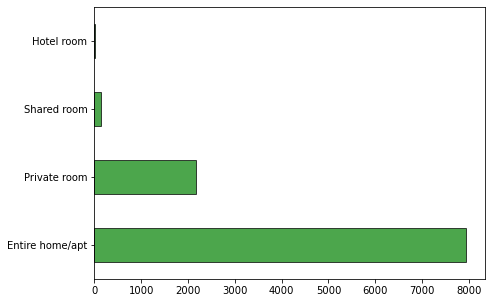

In [117]:
fig,axs = plt.subplots(figsize=(7,5))
df_listing.room_type.value_counts().plot(kind='barh',color='g',alpha=0.7,edgecolor='k');

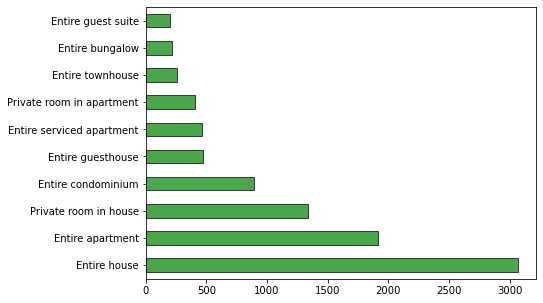

In [118]:
fig,ax = plt.subplots(figsize=(7,5))
df_listing.property_type.value_counts()[:10].plot(kind='barh',color='g',alpha=0.7,edgecolor='k');

In [119]:
#df_listing.info()

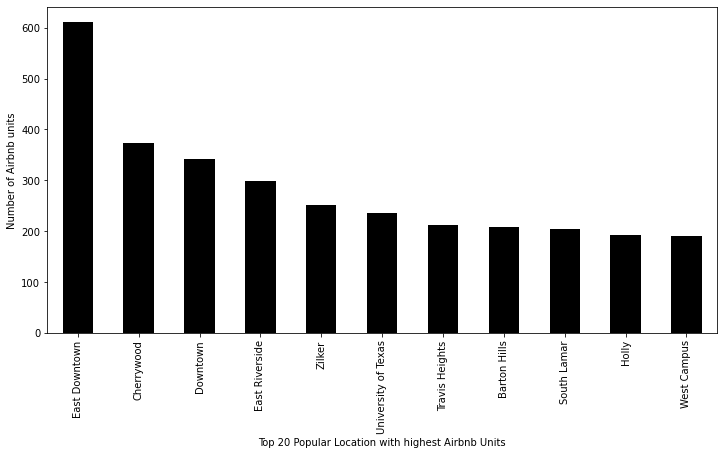

In [120]:
fig,ax = plt.subplots(figsize=(12,6));
ax = df_listing.host_neighbourhood.value_counts()[:11].plot.bar(color='k');
ax.set_ylabel('Number of Airbnb units');
ax.set_xlabel('Top 20 Popular Location with highest Airbnb Units');

In [121]:
dict_amenities = dict()
for lst in df_listing.amenities:
    for word in lst.replace('[','').replace('"','').replace(']','').replace(' ','').split(','):
        if word not in dict_amenities:
            dict_amenities[word] = 1
        else:
            dict_amenities[word] += 1

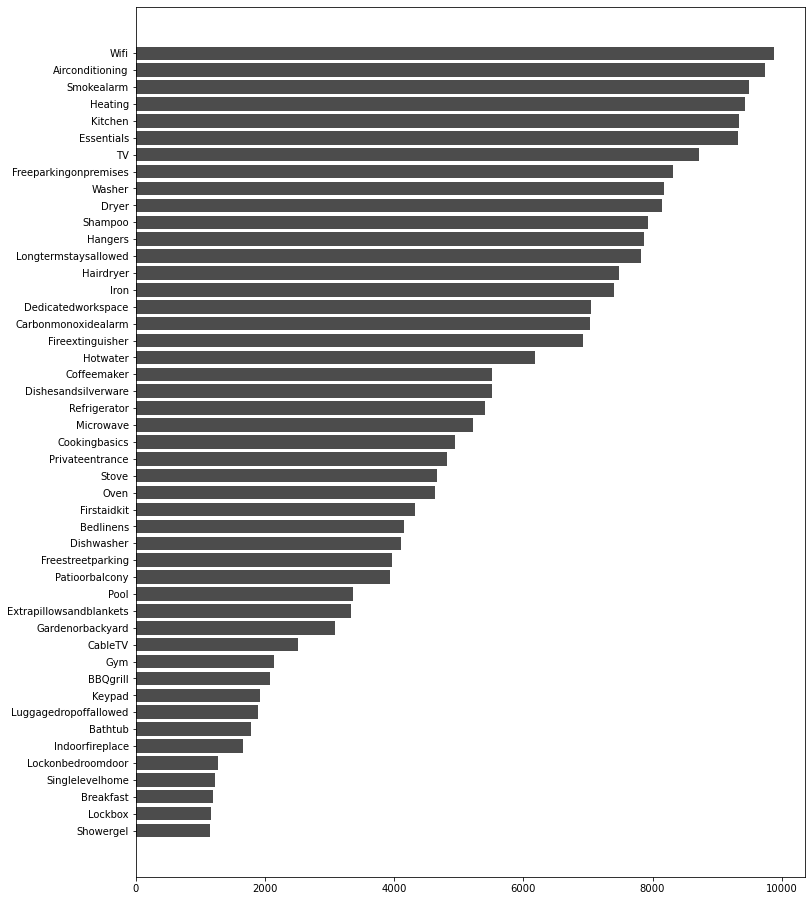

In [122]:
filtered_dict = {k:v for k,v in dict_amenities.items() if v>1000}
filtered_dict = {k:v for k,v in sorted(filtered_dict.items(),key=lambda item:item[1])}

fig,ax = plt.subplots(figsize=(12,16))
a= list(filtered_dict.keys())
b= filtered_dict.values()
# ax.bar(a,b)
plt.barh(a,b,color='k',alpha=0.7);

In [123]:
## Features to keep
# bbqgrill, gym, pool,private_entrance

# Most expensive house
# https://www.airbnb.com/rooms/46081394/photos?guests=1&adults=1
# https://www.airbnb.com/luxury/listing/36868497?source_impression_id=p3_1616965432_%2BtiLPpKVsNjbcXS8&guests=1&adults=1&check_in=2021-04-07&check_out=2021-04-10
#https://www.airbnb.com/rooms/46081476/photos?source_impression_id=p3_1616965591_2THtdQLDDHYaRava

Text(0.5, 0, 'Host Locations')

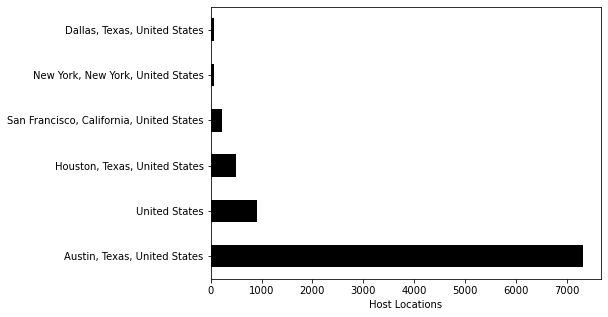

In [124]:
df_listing.host_location = df_listing.host_location.str.replace('US','United States')
fig,ax = plt.subplots(figsize=(7,5))
ax = df_listing.host_location.value_counts().head(6).plot(kind='barh',color='k')
ax.set_xlabel('Host Locations')

Text(0, 0.5, 'Median Price per Night')

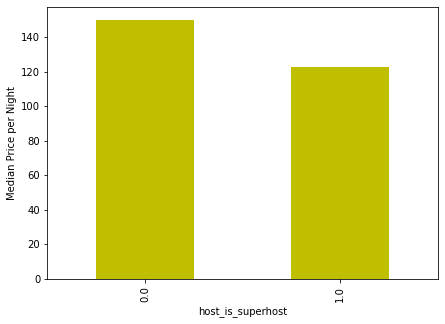

In [125]:
fig,ax = plt.subplots(figsize=(7,5));
df_listing.groupby('host_is_superhost').price.median().plot(kind='bar',color='y');
ax.set_ylabel('Median Price per Night')

In [126]:
df_listing.bedrooms = df_listing.bedrooms.fillna(0)

In [127]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10255 entries, 0 to 10271
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           10255 non-null  int64         
 1   listing_url                  10255 non-null  object        
 2   description                  10052 non-null  object        
 3   neighborhood_overview        6539 non-null   object        
 4   host_id                      10255 non-null  int64         
 5   host_since                   10250 non-null  datetime64[ns]
 6   host_location                10230 non-null  object        
 7   host_response_time           6059 non-null   object        
 8   host_response_rate           6059 non-null   object        
 9   host_acceptance_rate         6837 non-null   object        
 10  host_is_superhost            10250 non-null  float64       
 11  host_neighbourhood           8348 non-nul

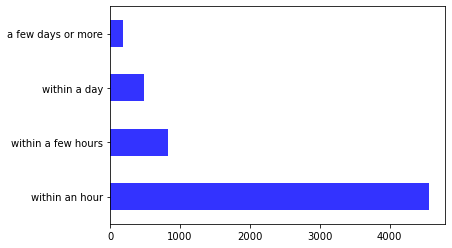

In [128]:
df_listing.host_response_time.value_counts().plot(kind='barh',color='b',alpha=0.8);

In [129]:
columns_to_remove2 = ['host_response_time','host_response_rate','host_neighbourhood'] 
df_listing.drop(columns_to_remove2,axis=1,inplace=True)

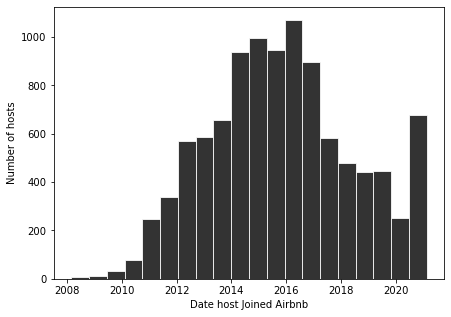

In [130]:
fig,ax = plt.subplots(figsize=(7,5))
df_listing.host_since.hist(bins=20,color='k',alpha=0.8,edgecolor='w')
ax.grid(None);
ax.set_xlabel('Date host Joined Airbnb');
ax.set_ylabel('Number of hosts');

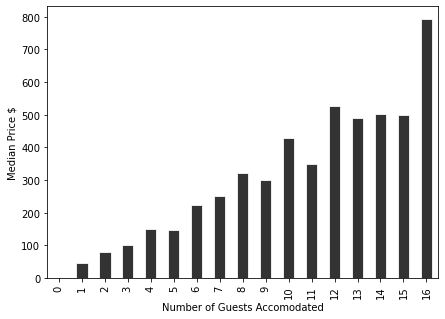

In [131]:
fig,ax = plt.subplots(figsize=(7,5))
ax = df_listing.groupby('accommodates').price.median().plot(kind='bar',color='k',alpha=0.8,edgecolor='w');
ax.set_xlabel('Number of Guests Accomodated');
ax.set_ylabel('Median Price $');

In [132]:
dummies_room_type = pd.get_dummies(df_listing.room_type,prefix='room_type_',drop_first=True)

In [133]:
df_listing = pd.concat([df_listing,dummies_room_type],axis=1)
df_listing.drop('room_type',axis=1,inplace=True)

In [134]:
df_listing.bathrooms_text = df_listing.bathrooms_text.str.replace('1 private bath','1 bath')
df_listing.bathrooms_text = df_listing.bathrooms_text.str.replace('1 shared bath','0.5 bath')
df_listing.bathrooms_text = df_listing.bathrooms_text.str.replace('1.5 shared baths','0.75 bath')
df_listing.bathrooms_text = df_listing.bathrooms_text.str.replace('2 shared baths','1 bath')
df_listing.bathrooms_text = df_listing.bathrooms_text.str.replace('Half-bath','0.5 bath')
df_listing.bathrooms_text = df_listing.bathrooms_text.str.replace('4 shared baths','2 baths')
df_listing.bathrooms_text = df_listing.bathrooms_text.str.replace('2.5 shared baths','1.25 baths')
df_listing.bathrooms_text = df_listing.bathrooms_text.str.replace('3 shared baths','1.5 baths')
df_listing.bathrooms_text = df_listing.bathrooms_text.str.replace('Private half-bath','0.5 bath')
df_listing.bathrooms_text = df_listing.bathrooms_text.str.replace('0 shared baths','0 bath')
df_listing.bathrooms_text = df_listing.bathrooms_text.str.replace('2 bath','2 baths')
df_listing.bathrooms_text = df_listing.bathrooms_text.str.replace('0 baths','0 bath')
df_listing = df_listing[df_listing.bathrooms_text.notnull()]
df_listing['bathrooms'] = df_listing.bathrooms_text.apply(lambda x:float(x.split(' ')[0]))
df_listing.drop('bathrooms_text',axis=1,inplace=True)

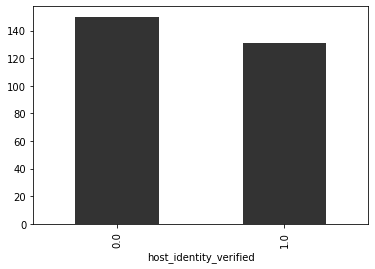

In [135]:
df_listing.loc[:,'host_identity_verified'] = df_listing.host_identity_verified.map({'t':1,'f':0});
df_listing.groupby('host_identity_verified').price.median().plot(kind='bar',color='k',alpha=0.8);

In [136]:
df_listing.drop('host_identity_verified',axis=1,inplace=True)
df_listing.drop('description',axis=1,inplace=True)
df_listing.drop('neighborhood_overview',axis=1,inplace=True)

In [137]:
property_type = ['Entire house','Entire apartment','Private room in house','Entire condominium','Entire guesthouse',             
'Entire serviced apartment','Private room in apartment','Entire townhouse','Entire bungalow','Entire guest suite']
df_listing.property_type = df_listing.property_type.apply(lambda x: 'other' if x not in property_type else x)
dummies_property_type = pd.get_dummies(df_listing.property_type,prefix='property_type',drop_first=True)
df_listing = pd.concat([df_listing,dummies_property_type],axis=1)
df_listing.drop('property_type',axis=1,inplace=True)

In [138]:
df_listing['pool'] = df_listing.amenities.apply(lambda x: 1 if 'pool' in x.lower() else 0)
df_listing['tv'] = df_listing.amenities.apply(lambda x: 1 if 'tv' in x.lower() else 0)
df_listing['washer'] = df_listing.amenities.apply(lambda x: 1 if 'washer' in x.lower() else 0)
df_listing['dryer'] = df_listing.amenities.apply(lambda x: 1 if 'dryer' in x.lower() else 0)
df_listing['balcony'] = df_listing.amenities.apply(lambda x: 1 if 'balcony' in x.lower() else 0)
df_listing['entrance'] = df_listing.amenities.apply(lambda x: 1 if 'entrance' in x.lower() else 0)
df_listing['bbq'] = df_listing.amenities.apply(lambda x: 1 if 'bbq' in x.lower() else 0)

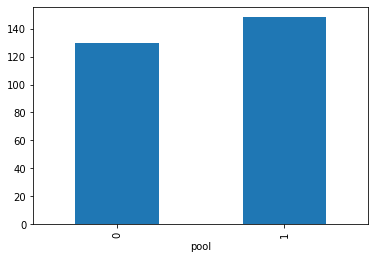

In [139]:
df_listing.groupby('pool').price.median().plot(kind='bar');

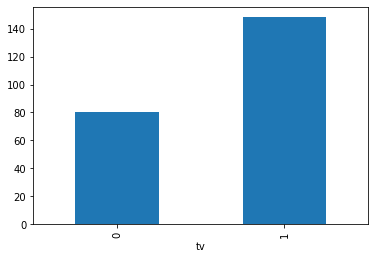

In [140]:
df_listing.groupby('tv').price.median().plot(kind='bar');

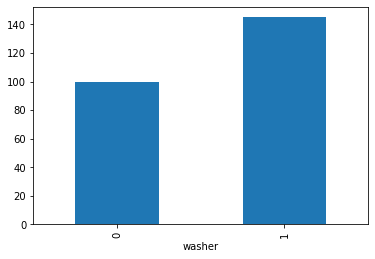

In [141]:
df_listing.groupby('washer').price.median().plot(kind='bar');

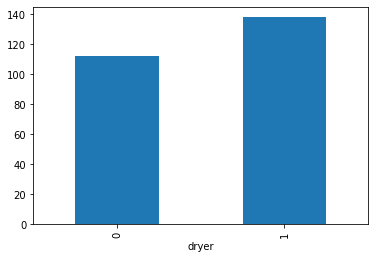

In [142]:
df_listing.groupby('dryer').price.median().plot(kind='bar');

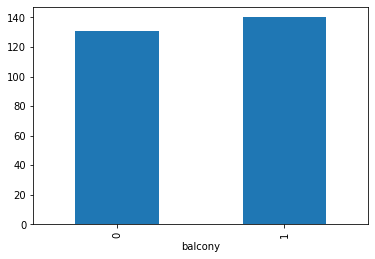

In [143]:
df_listing.groupby('balcony').price.median().plot(kind='bar');

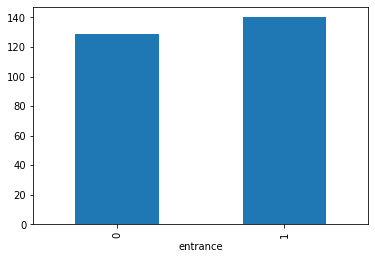

In [144]:
df_listing.groupby('entrance').price.median().plot(kind='bar');

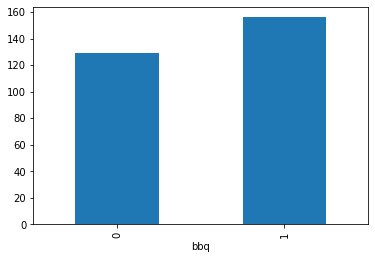

In [145]:
df_listing.groupby('bbq').price.median().plot(kind='bar');

In [150]:
df_listing.beds.fillna(value=0,inplace=True)
df_listing = df_listing[df_listing.host_is_superhost.notna()]

In [151]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10234 entries, 0 to 10271
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   id                                       10234 non-null  int64         
 1   listing_url                              10234 non-null  object        
 2   host_id                                  10234 non-null  int64         
 3   host_since                               10234 non-null  datetime64[ns]
 4   host_location                            10214 non-null  object        
 5   host_acceptance_rate                     6833 non-null   object        
 6   host_is_superhost                        10234 non-null  float64       
 7   host_listings_count                      10234 non-null  float64       
 8   host_total_listings_count                10234 non-null  float64       
 9   host_verifications                     

In [155]:
df_listing[df_listing.Timeframe.isna()]

,id,listing_url,host_id,host_since,host_location,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,zip_code,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,Timeframe,room_type__Hotel room,room_type__Private room,room_type__Shared room,bathrooms,property_type_Entire bungalow,property_type_Entire condominium,property_type_Entire guest suite,property_type_Entire guesthouse,property_type_Entire house,property_type_Entire serviced apartment,property_type_Entire townhouse,property_type_Private room in apartment,property_type_Private room in house,property_type_other,pool,tv,washer,dryer,balcony,entrance,bbq
51,80725,https://www.airbnb.com/rooms/80725,436771,2011-03-11,"Austin, Texas, United States",NaN,0.0,1.0,1.0,"['email', 'phone', 'kba']",78703,5,3.0,3.0,"[""Free parking on premises"", ""Hair dryer"", ""Ov...",150.0,30,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,2.0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
114,324480,https://www.airbnb.com/rooms/324480,1660476,2012-01-27,United States,50%,0.0,0.0,0.0,"['email', 'phone']",78705,2,1.0,1.0,"[""Air conditioning"", ""Heating"", ""TV"", ""Long te...",80.0,30,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
120,331549,https://www.airbnb.com/rooms/331549,1690383,2012-02-02,"Austin, Texas, United States",NaN,0.0,1.0,1.0,"['email', 'phone']",78725,2,1.0,1.0,"[""Indoor fireplace"", ""Free parking on premises...",100.0,2,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,1.0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0
121,333114,https://www.airbnb.com/rooms/333114,1697428,2012-02-04,"Austin, Texas, United States",NaN,0.0,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",78754,4,1.0,1.0,"[""Shampoo"", ""Free parking on premises"", ""Hair ...",109.0,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,2.0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0
126,340045,https://www.airbnb.com/rooms/340045,1725752,2012-02-09,"Austin, Texas, United States",NaN,0.0,1.0,1.0,"['email', 'phone', 'facebook', 'kba']",78746,3,1.0,1.0,"[""Indoor fireplace"", ""Free parking on premises...",400.0,4,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1.5,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10267,48107269,https://www.airbnb.com/rooms/48107269,368944610,2020-09-23,"Houston, Texas, United States",100%,0.0,1813.0,1813.0,['phone'],78758,5,2.0,2.0,"[""Hair dryer"", ""Oven"", ""Stove"", ""Dishes and si...",185.0,31,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,2.0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1,1,0
10268,48107277,https://www.airbnb.com/rooms/48107277,368944610,2020-09-23,"Houston, Texas, United States",100%,0.0,1813.0,1813.0,['phone'],78758,3,1.0,1.0,"[""Hair dryer"", ""Stove"", ""Oven"", ""Dishes and si...",153.0,31,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1.0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1,1,0
10269,48109299,https://www.airbnb.com/rooms/48109299,359036978,2020-07-28,"Houston, Texas, United States",94%,1.0,751.0,751.0,"['email', 'phone']",78729,3,1.0,1.0,"[""Free parking on premises"", ""Hair dryer"", ""Ov...",82.0,30,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1.0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1,1,1
10270,48109324,https://www.airbnb.com/rooms/48109324,359036978,2020-07-28,"Houston, Texas, United States",94%,1.0,751.0,751.0,"['email', 'phone']",78701,3,1.0,1.0,"[""Hair dryer"", ""Oven"", ""Stove"", ""Dishes and si...",153.0,30,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1.0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1,1,1


## Machine Learning Section

### Linear Regression

In [152]:
features =[]
X = df_listing[features]
y= df_listing.price
X_train,X_test,y_train,y_test = train_test_split(X,y)

### Decision Tree

### XGBoost 